# Density of water #

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## IAPWS IF97 ##

Water density is calculated using the *Revised Release on the IAPWS Industrial Formulation 1997 for the Thermodynamic Properties of Water and Steam*.

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [4]:
colnames = ['Pressure', 'Density']
nist_data = pd.read_csv('gold/water_density_nist_t200.csv', header=None, names=colnames)

Read in the MOOSE data.

In [2]:
moose_data = pd.read_csv('gold/WaterProperty_density_vpp_0001.csv')

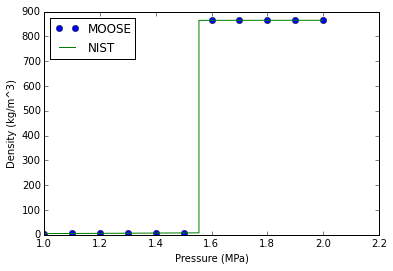

In [11]:
plt.plot((1+0.5* moose_data.x), moose_data.WaterPropertyAuxVariable,'o', label='MOOSE')
plt.plot(nist_data.Pressure, nist_data.Density, label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')

## Derivative of water density in region 1. ##

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [135]:
nist_data = pd.read_csv('gold/water_properties_nist_t50.txt', delimiter='\t', header=None)

Read in the MOOSE data.

In [132]:
moose_data = pd.read_csv('gold/WaterProperty_region1_dDensitydP_vpp_0001.csv')

Construct a density profile using the initial NIST density value, and the gradient given by the MOOSE derivative.

In [136]:
rho0=988.03
mdensity = np.zeros(len(moose_data))
mdensity[0] = rho0;
psteps = np.ediff1d(0.1e6*(10**moose_data.x))

for i in range(1,len(moose_data)) :
    mdensity[i] = mdensity[i-1] + moose_data.WaterPropertyAuxVariable[i-1] * psteps[i-1]

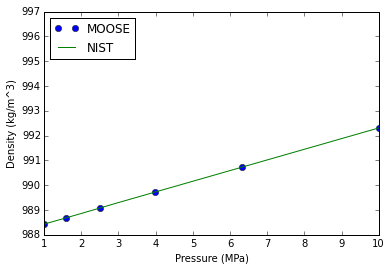

In [137]:
plt.plot(0.1*(10**moose_data.x), mdensity,'o', label='MOOSE')
plt.plot(nist_data.icol(1), nist_data.icol(2), label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')
plt.xlim([1,10]);

## Derivative of water density in region 1. ##

Read in data obtained from NIST webbook (http://webbook.nist.gov/chemistry/fluid/).

In [141]:
nist_data = pd.read_csv('gold/water_properties_nist_t350.txt', delimiter='\t', header=None)

Read in the MOOSE data.

In [138]:
moose_data = pd.read_csv('gold/WaterProperty_region2_dDensitydP_vpp_0001.csv')

Construct a density profile using the initial NIST density value, and the gradient given by the MOOSE derivative.

In [139]:
rho0=0.34832
mdensity = np.zeros(len(moose_data))
mdensity[0] = rho0;
psteps = np.ediff1d(0.1e6*(10**moose_data.x))

for i in range(1,len(moose_data)) :
    mdensity[i] = mdensity[i-1] + moose_data.WaterPropertyAuxVariable[i-1] * psteps[i-1]

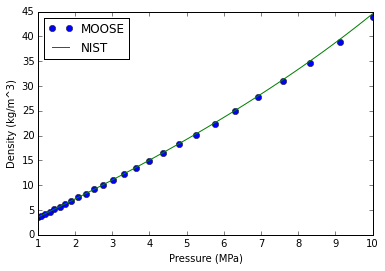

In [142]:
plt.plot(0.1*(10**moose_data.x), mdensity,'o', label='MOOSE')
plt.plot(nist_data.icol(1), nist_data.icol(2), label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')
plt.xlim([1,10]);

Compare the MOOSE results for density in region 2

In [127]:
moose_data = pd.read_csv('gold/WaterProperty_region2_density4_vpp_0001.csv')

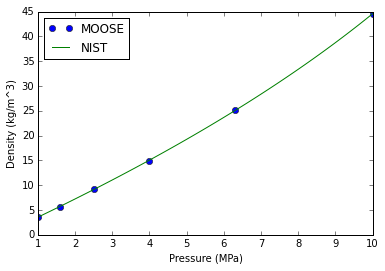

In [128]:
plt.plot(0.1*(10**moose_data.x), moose_data.WaterPropertyAuxVariable,'o', label='MOOSE')
plt.plot(nist_data.icol(1), nist_data.icol(2), label='NIST')
plt.legend(loc='upper left')
plt.xlabel('Pressure (MPa)')
plt.ylabel('Density (kg/m^3)')
plt.xlim([1,10]);